In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import os
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

path1 = '/content/drive/MyDrive/Colab_Notebooks/CNN'

x = []
y = []

In [ ]:
# 定義ImageDataGenerator
img_gen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True, rotation_range=10, 
                             width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.1)

# 定義ReduceLROnPlateau
learning_rate_function = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [ ]:
n = 1
for p in os.listdir(path1):
    path2 = path1 + f'/{p}'
    for i in os.listdir(path2):
        img = cv2.imread(f'{path2}/{i}')
        img = cv2.resize(img, (28, 28))
        # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Cv2讀進來是BGR，轉成RGB
        x.append(np.array(img))
        y.append(str(p))

In [ ]:
# Label encoding
label = LabelEncoder()
y = label.fit_transform(y)
y = to_categorical(y, 4)
x = np.array(x)
x = x / 255

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
img_gen.fit(x_train)
x_size = x.shape[0]
# print(x_size, x.ndim, x[0].shape)
# print(y.shape, y.ndim)

In [ ]:
# model-1: 0.7857(epoch = 40 or 50)
# i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (5, 5), strides=1, activation='relu')(i)
# x = Conv2D(64, (5, 5), strides=1, activation='relu')(x)
# x = Conv2D(128, (5, 5), strides=1, activation='relu')(x)

# x = Flatten()(x)
# x = Dense(1024, activation='relu')(x)
# x = Dense(4, activation='softmax')(x)

# model-3: 0.8333(epoch=300, filter=3*3)
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=1, activation='relu')(i)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(32, (3, 3), strides=1, activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(4, activation='softmax')(x)

# model-4: 0.7778(epoch = 300)
# i = Input(shape=x_train[0].shape)
# x = Conv2D(16, (3, 3), strides=1, activation='relu')(i)
# x = MaxPooling2D((2, 2))(x)
# x = Conv2D(16, (3, 3), strides=1, activation='relu')(x)
# x = MaxPooling2D((2, 2))(x)
# x = Conv2D(32, (3, 3), strides=1, activation='relu')(x)
# x = MaxPooling2D((2, 2))(x)

# x = Flatten()(x)
# x = Dense(1024, activation='relu')(x)  # 此model dense越大準確度越高
# x = Dense(4, activation='softmax')(x)

In [ ]:
model = Model(i, x)
batch_size = 32
steps_per_epoch = x_size // batch_size
model.compile(optimizer='adam', loss='categorical_crossentropy',  # for 2D y
              metrics=['accuracy'])

In [ ]:
# training model
r = model.fit_generator(img_gen.flow(x_train, y_train, batch_size=batch_size), epochs=300,
                        validation_data=(x_test, y_test), verbose=1, steps_per_epoch=steps_per_epoch, callbacks=[learning_rate_function])

Epoch 1/300


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


1/2 [==============>...............] - ETA: 0s - loss: 1.4732 - accuracy: 0.0312

2/2 [==============================] - 1s 333ms/step - loss: 1.4643 - accuracy: 0.0556 - val_loss: 1.2193 - val_accuracy: 0.4444 - lr: 0.0010
Epoch 2/300
2/2 [==============================] - ETA: 0s - loss: 1.2013 - accuracy: 0.3889

2/2 [==============================] - 0s 114ms/step - loss: 1.2013 - accuracy: 0.3889 - val_loss: 1.2243 - val_accuracy: 0.1667 - lr: 0.0010
Epoch 3/300
2/2 [==============================] - ETA: 0s - loss: 1.0788 - accuracy: 0.5000

2/2 [==============================] - 0s 106ms/step - loss: 1.0788 - accuracy: 0.5000 - val_loss: 1.1150 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 4/300
1/2 [==============>...............] - ETA: 0s - loss: 1.1070 - accuracy: 0.4375

2/2 [==============================] - 0s 77ms/step - loss: 1.0733 - accuracy: 0.3906 - val_loss: 1.0879 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 5/300
1/2 [==============>...............] - ETA: 0s - loss: 0.9638 - accuracy: 0.5000

2/2 [==============================] - 0s 72ms/step - loss: 1.0804 - accuracy: 0.4444 - val_loss: 1.1103 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 6/300
1/2 [==============>...............] - ETA: 0s - loss: 0.9613 - accuracy: 0.5625

2/2 [==============================] - 0s 79ms/step - loss: 0.9624 - accuracy: 0.5278 - val_loss: 1.1142 - val_accuracy: 0.6111 - lr: 0.0010
Epoch 7/300
2/2 [==============================] - ETA: 0s - loss: 0.9879 - accuracy: 0.5556

2/2 [==============================] - 0s 128ms/step - loss: 0.9879 - accuracy: 0.5556 - val_loss: 1.1496 - val_accuracy: 0.2778 - lr: 0.0010
Epoch 8/300
2/2 [==============================] - ETA: 0s - loss: 0.9979 - accuracy: 0.5312

2/2 [==============================] - 0s 106ms/step - loss: 0.9979 - accuracy: 0.5312 - val_loss: 1.2103 - val_accuracy: 0.1667 - lr: 0.0010
Epoch 9/300
2/2 [==============================] - ETA: 0s - loss: 0.9063 - accuracy: 0.6389

2/2 [==============================] - 0s 118ms/step - loss: 0.9063 - accuracy: 0.6389 - val_loss: 1.2950 - val_accuracy: 0.1667 - lr: 0.0010
Epoch 10/300
2/2 [==============================] - ETA: 0s - loss: 0.8757 - accuracy: 0.6111

2/2 [==============================] - 0s 102ms/step - loss: 0.8757 - accuracy: 0.6111 - val_loss: 1.5084 - val_accuracy: 0.1667 - lr: 0.0010
Epoch 11/300
2/2 [==============================] - ETA: 0s - loss: 0.9416 - accuracy: 0.4722

2/2 [==============================] - 0s 121ms/step - loss: 0.9416 - accuracy: 0.4722 - val_loss: 1.3356 - val_accuracy: 0.2778 - lr: 0.0010
Epoch 12/300
2/2 [==============================] - ETA: 0s - loss: 0.7817 - accuracy: 0.5278

2/2 [==============================] - 0s 116ms/step - loss: 0.7817 - accuracy: 0.5278 - val_loss: 1.2526 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 13/300
2/2 [==============================] - ETA: 0s - loss: 0.8749 - accuracy: 0.6389

2/2 [==============================] - 0s 106ms/step - loss: 0.8749 - accuracy: 0.6389 - val_loss: 1.2453 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 14/300
1/2 [==============>...............] - ETA: 0s - loss: 0.8560 - accuracy: 0.5938

2/2 [==============================] - 0s 86ms/step - loss: 0.8965 - accuracy: 0.5938 - val_loss: 1.2221 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 15/300
1/2 [==============>...............] - ETA: 0s - loss: 0.8975 - accuracy: 0.5938

2/2 [==============================] - 0s 65ms/step - loss: 0.8650 - accuracy: 0.5833 - val_loss: 1.2305 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 16/300
2/2 [==============================] - ETA: 0s - loss: 0.7499 - accuracy: 0.6944

2/2 [==============================] - 0s 116ms/step - loss: 0.7499 - accuracy: 0.6944 - val_loss: 1.3419 - val_accuracy: 0.2222 - lr: 0.0010
Epoch 17/300
2/2 [==============================] - ETA: 0s - loss: 0.6688 - accuracy: 0.7778

2/2 [==============================] - 0s 100ms/step - loss: 0.6688 - accuracy: 0.7778 - val_loss: 1.6641 - val_accuracy: 0.1667 - lr: 0.0010
Epoch 18/300
1/2 [==============>...............] - ETA: 0s - loss: 0.6872 - accuracy: 0.6875

2/2 [==============================] - 0s 83ms/step - loss: 0.7360 - accuracy: 0.6719 - val_loss: 1.7517 - val_accuracy: 0.1667 - lr: 0.0010
Epoch 19/300
1/2 [==============>...............] - ETA: 0s - loss: 0.8356 - accuracy: 0.5625

2/2 [==============================] - 0s 73ms/step - loss: 0.7965 - accuracy: 0.5833 - val_loss: 1.5249 - val_accuracy: 0.1667 - lr: 0.0010
Epoch 20/300
1/2 [==============>...............] - ETA: 0s - loss: 0.6881 - accuracy: 0.7188

2/2 [==============================] - 0s 73ms/step - loss: 0.6455 - accuracy: 0.7500 - val_loss: 1.3365 - val_accuracy: 0.2778 - lr: 0.0010
Epoch 21/300
2/2 [==============================] - ETA: 0s - loss: 0.5266 - accuracy: 0.8056

2/2 [==============================] - 0s 154ms/step - loss: 0.5266 - accuracy: 0.8056 - val_loss: 1.2769 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 22/300
1/2 [==============>...............] - ETA: 0s - loss: 0.5968 - accuracy: 0.7812

2/2 [==============================] - 0s 120ms/step - loss: 0.5974 - accuracy: 0.7778 - val_loss: 1.3076 - val_accuracy: 0.6111 - lr: 0.0010
Epoch 23/300
2/2 [==============================] - ETA: 0s - loss: 0.5213 - accuracy: 0.8594

2/2 [==============================] - 0s 117ms/step - loss: 0.5213 - accuracy: 0.8594 - val_loss: 1.3484 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 24/300
1/2 [==============>...............] - ETA: 0s - loss: 0.6030 - accuracy: 0.7812

2/2 [==============================] - 0s 100ms/step - loss: 0.5896 - accuracy: 0.8056 - val_loss: 1.2965 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 25/300
1/2 [==============>...............] - ETA: 0s - loss: 0.3959 - accuracy: 0.8750

2/2 [==============================] - 0s 106ms/step - loss: 0.4480 - accuracy: 0.8056 - val_loss: 1.1576 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 26/300
2/2 [==============================] - ETA: 0s - loss: 0.3915 - accuracy: 0.8906

2/2 [==============================] - 0s 132ms/step - loss: 0.3915 - accuracy: 0.8906 - val_loss: 1.0266 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 27/300
1/2 [==============>...............] - ETA: 0s - loss: 0.6609 - accuracy: 0.8125

2/2 [==============================] - 0s 113ms/step - loss: 0.6068 - accuracy: 0.8333 - val_loss: 1.0235 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 28/300
2/2 [==============================] - ETA: 0s - loss: 0.4430 - accuracy: 0.8056

2/2 [==============================] - 0s 141ms/step - loss: 0.4430 - accuracy: 0.8056 - val_loss: 1.1157 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 29/300
2/2 [==============================] - ETA: 0s - loss: 0.4602 - accuracy: 0.8125

2/2 [==============================] - 0s 155ms/step - loss: 0.4602 - accuracy: 0.8125 - val_loss: 1.3414 - val_accuracy: 0.4444 - lr: 0.0010
Epoch 30/300
2/2 [==============================] - ETA: 0s - loss: 0.3871 - accuracy: 0.8594

2/2 [==============================] - 0s 146ms/step - loss: 0.3871 - accuracy: 0.8594 - val_loss: 1.4852 - val_accuracy: 0.4444 - lr: 0.0010
Epoch 31/300
2/2 [==============================] - ETA: 0s - loss: 0.5204 - accuracy: 0.7778

2/2 [==============================] - 0s 222ms/step - loss: 0.5204 - accuracy: 0.7778 - val_loss: 1.4994 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 32/300
1/2 [==============>...............] - ETA: 0s - loss: 0.4305 - accuracy: 0.8438

2/2 [==============================] - 0s 73ms/step - loss: 0.3816 - accuracy: 0.8594 - val_loss: 1.4445 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 33/300
2/2 [==============================] - ETA: 0s - loss: 0.2410 - accuracy: 0.9444

2/2 [==============================] - 0s 126ms/step - loss: 0.2410 - accuracy: 0.9444 - val_loss: 1.5101 - val_accuracy: 0.6111 - lr: 0.0010
Epoch 34/300
1/2 [==============>...............] - ETA: 0s - loss: 0.2278 - accuracy: 0.9375

2/2 [==============================] - 0s 76ms/step - loss: 0.2557 - accuracy: 0.9167 - val_loss: 1.5798 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 35/300
2/2 [==============================] - ETA: 0s - loss: 0.4204 - accuracy: 0.8611

2/2 [==============================] - 0s 119ms/step - loss: 0.4204 - accuracy: 0.8611 - val_loss: 1.3937 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 36/300
2/2 [==============================] - ETA: 0s - loss: 0.5082 - accuracy: 0.8333

2/2 [==============================] - 0s 130ms/step - loss: 0.5082 - accuracy: 0.8333 - val_loss: 1.2955 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 37/300
1/2 [==============>...............] - ETA: 0s - loss: 0.3423 - accuracy: 0.7812

2/2 [==============================] - 0s 73ms/step - loss: 0.3796 - accuracy: 0.7778 - val_loss: 1.3239 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 38/300
1/2 [==============>...............] - ETA: 0s - loss: 0.3659 - accuracy: 0.8125

2/2 [==============================] - 0s 70ms/step - loss: 0.3947 - accuracy: 0.8056 - val_loss: 1.3567 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 39/300
1/2 [==============>...............] - ETA: 0s - loss: 0.3667 - accuracy: 0.9062

2/2 [==============================] - 0s 80ms/step - loss: 0.3330 - accuracy: 0.8906 - val_loss: 1.3040 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 40/300
2/2 [==============================] - ETA: 0s - loss: 0.1996 - accuracy: 0.9444

2/2 [==============================] - 0s 119ms/step - loss: 0.1996 - accuracy: 0.9444 - val_loss: 1.3051 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 41/300
1/2 [==============>...............] - ETA: 0s - loss: 0.5437 - accuracy: 0.8125

2/2 [==============================] - 0s 85ms/step - loss: 0.3847 - accuracy: 0.8750 - val_loss: 1.3963 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 42/300
1/2 [==============>...............] - ETA: 0s - loss: 0.4581 - accuracy: 0.8750

2/2 [==============================] - 0s 73ms/step - loss: 0.4209 - accuracy: 0.8889 - val_loss: 1.4757 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 43/300
1/2 [==============>...............] - ETA: 0s - loss: 0.2818 - accuracy: 0.9375

2/2 [==============================] - 0s 70ms/step - loss: 0.2679 - accuracy: 0.9444 - val_loss: 1.5201 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 44/300
1/2 [==============>...............] - ETA: 0s - loss: 0.2909 - accuracy: 0.9062

2/2 [==============================] - 0s 80ms/step - loss: 0.2812 - accuracy: 0.9062 - val_loss: 1.5240 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 45/300
1/2 [==============>...............] - ETA: 0s - loss: 0.3123 - accuracy: 0.9062

2/2 [==============================] - 0s 85ms/step - loss: 0.3168 - accuracy: 0.8906 - val_loss: 1.5601 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 46/300
1/2 [==============>...............] - ETA: 0s - loss: 0.2429 - accuracy: 0.9062

2/2 [==============================] - 0s 67ms/step - loss: 0.2241 - accuracy: 0.9167 - val_loss: 1.6251 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 47/300
2/2 [==============================] - ETA: 0s - loss: 0.2250 - accuracy: 0.9531

2/2 [==============================] - 0s 98ms/step - loss: 0.2250 - accuracy: 0.9531 - val_loss: 1.6589 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 48/300
2/2 [==============================] - ETA: 0s - loss: 0.2545 - accuracy: 0.9375

2/2 [==============================] - 0s 112ms/step - loss: 0.2545 - accuracy: 0.9375 - val_loss: 1.6673 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 49/300
2/2 [==============================] - ETA: 0s - loss: 0.1870 - accuracy: 0.9688

2/2 [==============================] - 0s 112ms/step - loss: 0.1870 - accuracy: 0.9688 - val_loss: 1.6647 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 50/300
2/2 [==============================] - ETA: 0s - loss: 0.1931 - accuracy: 0.9444

2/2 [==============================] - 0s 127ms/step - loss: 0.1931 - accuracy: 0.9444 - val_loss: 1.6799 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 51/300
2/2 [==============================] - ETA: 0s - loss: 0.4444 - accuracy: 0.8056

2/2 [==============================] - 0s 132ms/step - loss: 0.4444 - accuracy: 0.8056 - val_loss: 1.5545 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 52/300
2/2 [==============================] - ETA: 0s - loss: 0.2173 - accuracy: 0.9167

2/2 [==============================] - 0s 136ms/step - loss: 0.2173 - accuracy: 0.9167 - val_loss: 1.4332 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 53/300
2/2 [==============================] - ETA: 0s - loss: 0.2464 - accuracy: 0.8889

2/2 [==============================] - 0s 111ms/step - loss: 0.2464 - accuracy: 0.8889 - val_loss: 1.3916 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 54/300
2/2 [==============================] - ETA: 0s - loss: 0.3138 - accuracy: 0.8889

2/2 [==============================] - 0s 122ms/step - loss: 0.3138 - accuracy: 0.8889 - val_loss: 1.3985 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 55/300
1/2 [==============>...............] - ETA: 0s - loss: 0.2900 - accuracy: 0.8438

2/2 [==============================] - 0s 72ms/step - loss: 0.2238 - accuracy: 0.9062 - val_loss: 1.5683 - val_accuracy: 0.6111 - lr: 0.0010
Epoch 56/300
1/2 [==============>...............] - ETA: 0s - loss: 0.2755 - accuracy: 0.8125

2/2 [==============================] - 0s 67ms/step - loss: 0.2828 - accuracy: 0.8056 - val_loss: 1.5538 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 57/300
2/2 [==============================] - ETA: 0s - loss: 0.1807 - accuracy: 0.9444

2/2 [==============================] - 0s 115ms/step - loss: 0.1807 - accuracy: 0.9444 - val_loss: 1.4673 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 58/300
2/2 [==============================] - ETA: 0s - loss: 0.2314 - accuracy: 0.9062

2/2 [==============================] - 0s 99ms/step - loss: 0.2314 - accuracy: 0.9062 - val_loss: 1.4622 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 59/300
2/2 [==============================] - ETA: 0s - loss: 0.2108 - accuracy: 0.8889

2/2 [==============================] - 0s 98ms/step - loss: 0.2108 - accuracy: 0.8889 - val_loss: 1.4849 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 60/300
2/2 [==============================] - ETA: 0s - loss: 0.1836 - accuracy: 0.9167

2/2 [==============================] - 0s 112ms/step - loss: 0.1836 - accuracy: 0.9167 - val_loss: 1.5120 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 61/300
1/2 [==============>...............] - ETA: 0s - loss: 0.2499 - accuracy: 0.9062

2/2 [==============================] - 0s 165ms/step - loss: 0.2343 - accuracy: 0.9167 - val_loss: 1.5563 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 62/300
1/2 [==============>...............] - ETA: 0s - loss: 0.1573 - accuracy: 0.9375

2/2 [==============================] - 0s 80ms/step - loss: 0.1624 - accuracy: 0.9375 - val_loss: 1.6066 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 63/300
2/2 [==============================] - ETA: 0s - loss: 0.2224 - accuracy: 0.9062

2/2 [==============================] - 0s 108ms/step - loss: 0.2224 - accuracy: 0.9062 - val_loss: 1.6256 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 64/300
1/2 [==============>...............] - ETA: 0s - loss: 0.1057 - accuracy: 0.9688

2/2 [==============================] - 0s 72ms/step - loss: 0.0973 - accuracy: 0.9722 - val_loss: 1.6259 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 65/300
1/2 [==============>...............] - ETA: 0s - loss: 0.1223 - accuracy: 1.0000

2/2 [==============================] - 0s 87ms/step - loss: 0.1464 - accuracy: 0.9722 - val_loss: 1.6812 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 66/300
1/2 [==============>...............] - ETA: 0s - loss: 0.1319 - accuracy: 0.9688

2/2 [==============================] - 0s 71ms/step - loss: 0.1195 - accuracy: 0.9722 - val_loss: 1.9539 - val_accuracy: 0.4444 - lr: 0.0010
Epoch 67/300
1/2 [==============>...............] - ETA: 0s - loss: 0.2717 - accuracy: 0.8750

2/2 [==============================] - 0s 75ms/step - loss: 0.3514 - accuracy: 0.8281 - val_loss: 1.8616 - val_accuracy: 0.4444 - lr: 0.0010
Epoch 68/300
2/2 [==============================] - ETA: 0s - loss: 0.0861 - accuracy: 0.9722

2/2 [==============================] - 0s 108ms/step - loss: 0.0861 - accuracy: 0.9722 - val_loss: 1.6243 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 69/300
2/2 [==============================] - ETA: 0s - loss: 0.2583 - accuracy: 0.9444

2/2 [==============================] - 0s 138ms/step - loss: 0.2583 - accuracy: 0.9444 - val_loss: 1.6197 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 70/300
1/2 [==============>...............] - ETA: 0s - loss: 0.1576 - accuracy: 0.9688

2/2 [==============================] - 0s 93ms/step - loss: 0.1470 - accuracy: 0.9531 - val_loss: 1.6912 - val_accuracy: 0.6111 - lr: 0.0010
Epoch 71/300
2/2 [==============================] - ETA: 0s - loss: 0.1380 - accuracy: 0.9444

2/2 [==============================] - 0s 110ms/step - loss: 0.1380 - accuracy: 0.9444 - val_loss: 1.7962 - val_accuracy: 0.5556 - lr: 0.0010
Epoch 72/300
1/2 [==============>...............] - ETA: 0s - loss: 0.2895 - accuracy: 0.8750

2/2 [==============================] - 0s 80ms/step - loss: 0.1978 - accuracy: 0.9219 - val_loss: 1.7549 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 73/300
2/2 [==============================] - ETA: 0s - loss: 0.1126 - accuracy: 0.9688

2/2 [==============================] - 0s 114ms/step - loss: 0.1126 - accuracy: 0.9688 - val_loss: 1.6872 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 74/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0940 - accuracy: 1.0000

2/2 [==============================] - 0s 68ms/step - loss: 0.0841 - accuracy: 1.0000 - val_loss: 1.6706 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 75/300
1/2 [==============>...............] - ETA: 0s - loss: 0.1557 - accuracy: 0.9375

2/2 [==============================] - 0s 62ms/step - loss: 0.1553 - accuracy: 0.9444 - val_loss: 1.7005 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 76/300
2/2 [==============================] - ETA: 0s - loss: 0.1248 - accuracy: 0.9722

2/2 [==============================] - 0s 127ms/step - loss: 0.1248 - accuracy: 0.9722 - val_loss: 1.7337 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 77/300
1/2 [==============>...............] - ETA: 0s - loss: 0.1851 - accuracy: 0.9375

2/2 [==============================] - 0s 85ms/step - loss: 0.1487 - accuracy: 0.9531 - val_loss: 1.6891 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 78/300
1/2 [==============>...............] - ETA: 0s - loss: 0.1152 - accuracy: 0.9375

2/2 [==============================] - 0s 70ms/step - loss: 0.1436 - accuracy: 0.9167 - val_loss: 1.6338 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 79/300
1/2 [==============>...............] - ETA: 0s - loss: 0.1093 - accuracy: 0.9375

2/2 [==============================] - 0s 68ms/step - loss: 0.1284 - accuracy: 0.9167 - val_loss: 1.6586 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 80/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0557 - accuracy: 1.0000

2/2 [==============================] - 0s 90ms/step - loss: 0.0990 - accuracy: 0.9844 - val_loss: 1.6401 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 81/300
1/2 [==============>...............] - ETA: 0s - loss: 0.1299 - accuracy: 0.9688

2/2 [==============================] - 0s 85ms/step - loss: 0.1269 - accuracy: 0.9688 - val_loss: 1.6264 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 82/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0850 - accuracy: 0.9688

2/2 [==============================] - 0s 66ms/step - loss: 0.0807 - accuracy: 0.9722 - val_loss: 1.6310 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 83/300
2/2 [==============================] - ETA: 0s - loss: 0.1251 - accuracy: 0.9722

2/2 [==============================] - 0s 122ms/step - loss: 0.1251 - accuracy: 0.9722 - val_loss: 1.5757 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 84/300
1/2 [==============>...............] - ETA: 0s - loss: 0.1345 - accuracy: 0.9688

2/2 [==============================] - 0s 76ms/step - loss: 0.1200 - accuracy: 0.9722 - val_loss: 1.5919 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 85/300
2/2 [==============================] - ETA: 0s - loss: 0.0987 - accuracy: 0.9444

2/2 [==============================] - 0s 109ms/step - loss: 0.0987 - accuracy: 0.9444 - val_loss: 1.5822 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 86/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0870 - accuracy: 1.0000

2/2 [==============================] - 0s 86ms/step - loss: 0.1180 - accuracy: 0.9531 - val_loss: 1.5440 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 87/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0985 - accuracy: 0.9688

2/2 [==============================] - 0s 92ms/step - loss: 0.1147 - accuracy: 0.9688 - val_loss: 1.5758 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 88/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0826 - accuracy: 0.9688

2/2 [==============================] - 0s 84ms/step - loss: 0.1091 - accuracy: 0.9531 - val_loss: 1.5558 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 89/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0786 - accuracy: 0.9688

2/2 [==============================] - 0s 92ms/step - loss: 0.1056 - accuracy: 0.9844 - val_loss: 1.5112 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 90/300
1/2 [==============>...............] - ETA: 0s - loss: 0.1036 - accuracy: 1.0000

2/2 [==============================] - 0s 78ms/step - loss: 0.0789 - accuracy: 0.9844 - val_loss: 1.5246 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 91/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0826 - accuracy: 1.0000

2/2 [==============================] - 0s 70ms/step - loss: 0.0908 - accuracy: 1.0000 - val_loss: 1.6473 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 92/300
1/2 [==============>...............] - ETA: 0s - loss: 0.1050 - accuracy: 0.9688

2/2 [==============================] - 0s 71ms/step - loss: 0.0987 - accuracy: 0.9722 - val_loss: 1.8063 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 93/300
2/2 [==============================] - ETA: 0s - loss: 0.0863 - accuracy: 0.9722

2/2 [==============================] - 0s 122ms/step - loss: 0.0863 - accuracy: 0.9722 - val_loss: 1.9479 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 94/300
2/2 [==============================] - ETA: 0s - loss: 0.1558 - accuracy: 0.9375

2/2 [==============================] - 0s 101ms/step - loss: 0.1558 - accuracy: 0.9375 - val_loss: 1.8400 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 95/300
2/2 [==============================] - ETA: 0s - loss: 0.0980 - accuracy: 0.9444

2/2 [==============================] - 0s 133ms/step - loss: 0.0980 - accuracy: 0.9444 - val_loss: 1.7024 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 96/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0969 - accuracy: 0.9688

2/2 [==============================] - 0s 78ms/step - loss: 0.0874 - accuracy: 0.9722 - val_loss: 1.5746 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 97/300
2/2 [==============================] - ETA: 0s - loss: 0.0735 - accuracy: 0.9722

2/2 [==============================] - 0s 112ms/step - loss: 0.0735 - accuracy: 0.9722 - val_loss: 1.4719 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 98/300
2/2 [==============================] - ETA: 0s - loss: 0.1128 - accuracy: 0.9444

2/2 [==============================] - 0s 109ms/step - loss: 0.1128 - accuracy: 0.9444 - val_loss: 1.4052 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 99/300
1/2 [==============>...............] - ETA: 0s - loss: 0.1763 - accuracy: 0.9688

2/2 [==============================] - 0s 81ms/step - loss: 0.1100 - accuracy: 0.9844 - val_loss: 1.3802 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 100/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0459 - accuracy: 1.0000

2/2 [==============================] - 0s 79ms/step - loss: 0.0502 - accuracy: 1.0000 - val_loss: 1.3839 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 101/300
2/2 [==============================] - ETA: 0s - loss: 0.0712 - accuracy: 0.9844

2/2 [==============================] - 0s 118ms/step - loss: 0.0712 - accuracy: 0.9844 - val_loss: 1.4220 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 102/300
2/2 [==============================] - ETA: 0s - loss: 0.0441 - accuracy: 1.0000

2/2 [==============================] - 0s 97ms/step - loss: 0.0441 - accuracy: 1.0000 - val_loss: 1.4825 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 103/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0372 - accuracy: 1.0000

2/2 [==============================] - 0s 79ms/step - loss: 0.0351 - accuracy: 1.0000 - val_loss: 1.5401 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 104/300
2/2 [==============================] - ETA: 0s - loss: 0.0788 - accuracy: 1.0000

2/2 [==============================] - 0s 114ms/step - loss: 0.0788 - accuracy: 1.0000 - val_loss: 1.5913 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 105/300
2/2 [==============================] - ETA: 0s - loss: 0.0836 - accuracy: 0.9722

2/2 [==============================] - 0s 116ms/step - loss: 0.0836 - accuracy: 0.9722 - val_loss: 1.6438 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 106/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0540 - accuracy: 1.0000

2/2 [==============================] - 0s 79ms/step - loss: 0.0481 - accuracy: 1.0000 - val_loss: 1.7024 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 107/300
2/2 [==============================] - ETA: 0s - loss: 0.0402 - accuracy: 1.0000

2/2 [==============================] - 0s 118ms/step - loss: 0.0402 - accuracy: 1.0000 - val_loss: 1.7708 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 108/300
2/2 [==============================] - ETA: 0s - loss: 0.0707 - accuracy: 0.9688

2/2 [==============================] - 0s 117ms/step - loss: 0.0707 - accuracy: 0.9688 - val_loss: 1.7624 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 109/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0772 - accuracy: 0.9375

2/2 [==============================] - 0s 86ms/step - loss: 0.0622 - accuracy: 0.9531 - val_loss: 1.7270 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 110/300
2/2 [==============================] - ETA: 0s - loss: 0.0593 - accuracy: 1.0000

2/2 [==============================] - 0s 112ms/step - loss: 0.0593 - accuracy: 1.0000 - val_loss: 1.7428 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 111/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0470 - accuracy: 1.0000

2/2 [==============================] - 0s 69ms/step - loss: 0.0459 - accuracy: 1.0000 - val_loss: 1.7731 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 112/300
2/2 [==============================] - ETA: 0s - loss: 0.1087 - accuracy: 0.9722

2/2 [==============================] - 0s 139ms/step - loss: 0.1087 - accuracy: 0.9722 - val_loss: 1.7997 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 113/300
2/2 [==============================] - ETA: 0s - loss: 0.0599 - accuracy: 0.9844

2/2 [==============================] - 0s 96ms/step - loss: 0.0599 - accuracy: 0.9844 - val_loss: 1.7147 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 114/300
2/2 [==============================] - ETA: 0s - loss: 0.0749 - accuracy: 0.9844

2/2 [==============================] - 0s 108ms/step - loss: 0.0749 - accuracy: 0.9844 - val_loss: 1.6578 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 115/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0202 - accuracy: 1.0000

2/2 [==============================] - 0s 76ms/step - loss: 0.0715 - accuracy: 0.9722 - val_loss: 1.6861 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 116/300
1/2 [==============>...............] - ETA: 0s - loss: 0.1710 - accuracy: 0.9062

2/2 [==============================] - 0s 86ms/step - loss: 0.1677 - accuracy: 0.9167 - val_loss: 1.7412 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 117/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0327 - accuracy: 1.0000

2/2 [==============================] - 0s 98ms/step - loss: 0.0312 - accuracy: 1.0000 - val_loss: 1.9300 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 118/300
1/2 [==============>...............] - ETA: 0s - loss: 0.1288 - accuracy: 0.9375

2/2 [==============================] - 0s 80ms/step - loss: 0.1179 - accuracy: 0.9444 - val_loss: 1.8752 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 119/300
1/2 [==============>...............] - ETA: 0s - loss: 0.1485 - accuracy: 0.9062

2/2 [==============================] - 0s 86ms/step - loss: 0.1356 - accuracy: 0.9167 - val_loss: 1.6348 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 120/300
2/2 [==============================] - ETA: 0s - loss: 0.0963 - accuracy: 0.9688

2/2 [==============================] - 0s 136ms/step - loss: 0.0963 - accuracy: 0.9688 - val_loss: 1.5828 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 121/300
2/2 [==============================] - ETA: 0s - loss: 0.0543 - accuracy: 0.9722

2/2 [==============================] - 0s 153ms/step - loss: 0.0543 - accuracy: 0.9722 - val_loss: 1.6377 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 122/300
1/2 [==============>...............] - ETA: 0s - loss: 0.1023 - accuracy: 0.9688

2/2 [==============================] - 0s 89ms/step - loss: 0.1518 - accuracy: 0.9444 - val_loss: 1.6576 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 123/300
2/2 [==============================] - ETA: 0s - loss: 0.0581 - accuracy: 0.9844

2/2 [==============================] - 0s 97ms/step - loss: 0.0581 - accuracy: 0.9844 - val_loss: 1.9952 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 124/300
2/2 [==============================] - ETA: 0s - loss: 0.1627 - accuracy: 0.8889

2/2 [==============================] - 0s 125ms/step - loss: 0.1627 - accuracy: 0.8889 - val_loss: 1.8592 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 125/300
2/2 [==============================] - ETA: 0s - loss: 0.0492 - accuracy: 1.0000

2/2 [==============================] - 0s 137ms/step - loss: 0.0492 - accuracy: 1.0000 - val_loss: 1.6532 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 126/300
2/2 [==============================] - ETA: 0s - loss: 0.0469 - accuracy: 0.9844

2/2 [==============================] - 0s 101ms/step - loss: 0.0469 - accuracy: 0.9844 - val_loss: 1.6303 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 127/300
2/2 [==============================] - ETA: 0s - loss: 0.1422 - accuracy: 0.9167

2/2 [==============================] - 0s 121ms/step - loss: 0.1422 - accuracy: 0.9167 - val_loss: 1.5997 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 128/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0505 - accuracy: 0.9688

2/2 [==============================] - 0s 106ms/step - loss: 0.0500 - accuracy: 0.9722 - val_loss: 1.5167 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 129/300
2/2 [==============================] - ETA: 0s - loss: 0.0844 - accuracy: 0.9722

2/2 [==============================] - 0s 123ms/step - loss: 0.0844 - accuracy: 0.9722 - val_loss: 1.4902 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 130/300
2/2 [==============================] - ETA: 0s - loss: 0.0573 - accuracy: 1.0000

2/2 [==============================] - 0s 96ms/step - loss: 0.0573 - accuracy: 1.0000 - val_loss: 1.5203 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 131/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0376 - accuracy: 1.0000

2/2 [==============================] - 0s 85ms/step - loss: 0.0347 - accuracy: 1.0000 - val_loss: 1.5860 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 132/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0918 - accuracy: 0.9375

2/2 [==============================] - 0s 83ms/step - loss: 0.0709 - accuracy: 0.9688 - val_loss: 1.6107 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 133/300
2/2 [==============================] - ETA: 0s - loss: 0.0351 - accuracy: 1.0000

2/2 [==============================] - 0s 128ms/step - loss: 0.0351 - accuracy: 1.0000 - val_loss: 1.5958 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 134/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0474 - accuracy: 1.0000

2/2 [==============================] - 0s 71ms/step - loss: 0.0430 - accuracy: 1.0000 - val_loss: 1.6016 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 135/300
2/2 [==============================] - ETA: 0s - loss: 0.0355 - accuracy: 1.0000

2/2 [==============================] - 0s 100ms/step - loss: 0.0355 - accuracy: 1.0000 - val_loss: 1.6279 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 136/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0639 - accuracy: 1.0000

2/2 [==============================] - 0s 66ms/step - loss: 0.0590 - accuracy: 1.0000 - val_loss: 1.6595 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 137/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0456 - accuracy: 1.0000

2/2 [==============================] - 0s 84ms/step - loss: 0.0450 - accuracy: 1.0000 - val_loss: 1.6745 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 138/300
2/2 [==============================] - ETA: 0s - loss: 0.0386 - accuracy: 0.9844

2/2 [==============================] - 0s 112ms/step - loss: 0.0386 - accuracy: 0.9844 - val_loss: 1.6601 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 139/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0606 - accuracy: 1.0000

2/2 [==============================] - 0s 82ms/step - loss: 0.0489 - accuracy: 1.0000 - val_loss: 1.6709 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 140/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0285 - accuracy: 1.0000

2/2 [==============================] - 0s 79ms/step - loss: 0.0282 - accuracy: 1.0000 - val_loss: 1.6812 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 141/300
2/2 [==============================] - ETA: 0s - loss: 0.0279 - accuracy: 1.0000

2/2 [==============================] - 0s 109ms/step - loss: 0.0279 - accuracy: 1.0000 - val_loss: 1.6914 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 142/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0296 - accuracy: 1.0000

2/2 [==============================] - 0s 74ms/step - loss: 0.0933 - accuracy: 0.9722 - val_loss: 1.6852 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 143/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0555 - accuracy: 0.9688

2/2 [==============================] - 0s 83ms/step - loss: 0.0601 - accuracy: 0.9688 - val_loss: 1.8176 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 144/300
2/2 [==============================] - ETA: 0s - loss: 0.0589 - accuracy: 0.9722

2/2 [==============================] - 0s 142ms/step - loss: 0.0589 - accuracy: 0.9722 - val_loss: 1.8928 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 145/300
1/2 [==============>...............] - ETA: 0s - loss: 0.1108 - accuracy: 0.9688

2/2 [==============================] - 0s 69ms/step - loss: 0.1113 - accuracy: 0.9722 - val_loss: 1.6478 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 146/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0553 - accuracy: 0.9688

2/2 [==============================] - 0s 85ms/step - loss: 0.0488 - accuracy: 0.9844 - val_loss: 1.4017 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 147/300
2/2 [==============================] - ETA: 0s - loss: 0.0360 - accuracy: 1.0000

2/2 [==============================] - 0s 128ms/step - loss: 0.0360 - accuracy: 1.0000 - val_loss: 1.3876 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 148/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0750 - accuracy: 1.0000

2/2 [==============================] - 0s 90ms/step - loss: 0.0688 - accuracy: 1.0000 - val_loss: 1.4560 - val_accuracy: 0.6111 - lr: 0.0010
Epoch 149/300
2/2 [==============================] - ETA: 0s - loss: 0.1334 - accuracy: 0.9444

2/2 [==============================] - 0s 133ms/step - loss: 0.1334 - accuracy: 0.9444 - val_loss: 1.5468 - val_accuracy: 0.6111 - lr: 0.0010
Epoch 150/300
1/2 [==============>...............] - ETA: 0s - loss: 0.1601 - accuracy: 0.9062

2/2 [==============================] - 0s 86ms/step - loss: 0.0863 - accuracy: 0.9531 - val_loss: 1.5063 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 151/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0492 - accuracy: 1.0000

2/2 [==============================] - 0s 101ms/step - loss: 0.0447 - accuracy: 1.0000 - val_loss: 1.5246 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 152/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0145 - accuracy: 1.0000

2/2 [==============================] - 0s 99ms/step - loss: 0.0200 - accuracy: 1.0000 - val_loss: 1.5816 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 153/300
2/2 [==============================] - ETA: 0s - loss: 0.0381 - accuracy: 1.0000

2/2 [==============================] - 0s 98ms/step - loss: 0.0381 - accuracy: 1.0000 - val_loss: 1.6511 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 154/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0584 - accuracy: 0.9688

2/2 [==============================] - 0s 75ms/step - loss: 0.0610 - accuracy: 0.9722 - val_loss: 1.7592 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 155/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0383 - accuracy: 1.0000

2/2 [==============================] - 0s 109ms/step - loss: 0.0345 - accuracy: 1.0000 - val_loss: 1.8893 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 156/300
2/2 [==============================] - ETA: 0s - loss: 0.0580 - accuracy: 0.9844

2/2 [==============================] - 0s 104ms/step - loss: 0.0580 - accuracy: 0.9844 - val_loss: 1.9391 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 157/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0382 - accuracy: 0.9688

2/2 [==============================] - 0s 65ms/step - loss: 0.0361 - accuracy: 0.9722 - val_loss: 1.8831 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 158/300
2/2 [==============================] - ETA: 0s - loss: 0.0386 - accuracy: 1.0000

2/2 [==============================] - 0s 118ms/step - loss: 0.0386 - accuracy: 1.0000 - val_loss: 1.8689 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 159/300
2/2 [==============================] - ETA: 0s - loss: 0.0459 - accuracy: 0.9844

2/2 [==============================] - 0s 119ms/step - loss: 0.0459 - accuracy: 0.9844 - val_loss: 1.9442 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 160/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0254 - accuracy: 1.0000

2/2 [==============================] - 0s 69ms/step - loss: 0.0232 - accuracy: 1.0000 - val_loss: 1.9697 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 161/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0939 - accuracy: 0.9688

2/2 [==============================] - 0s 83ms/step - loss: 0.0926 - accuracy: 0.9722 - val_loss: 1.8580 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 162/300
2/2 [==============================] - ETA: 0s - loss: 0.0221 - accuracy: 1.0000

2/2 [==============================] - 0s 134ms/step - loss: 0.0221 - accuracy: 1.0000 - val_loss: 1.8122 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 163/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0316 - accuracy: 1.0000

2/2 [==============================] - 0s 67ms/step - loss: 0.0306 - accuracy: 1.0000 - val_loss: 1.8707 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 164/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0777 - accuracy: 0.9688

2/2 [==============================] - 0s 78ms/step - loss: 0.0792 - accuracy: 0.9722 - val_loss: 1.9835 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 165/300
2/2 [==============================] - ETA: 0s - loss: 0.0140 - accuracy: 1.0000

2/2 [==============================] - 0s 112ms/step - loss: 0.0140 - accuracy: 1.0000 - val_loss: 2.0786 - val_accuracy: 0.3889 - lr: 0.0010
Epoch 166/300
2/2 [==============================] - ETA: 0s - loss: 0.1088 - accuracy: 0.9444    

2/2 [==============================] - 0s 118ms/step - loss: 0.1088 - accuracy: 0.9444 - val_loss: 2.0469 - val_accuracy: 0.3889 - lr: 0.0010
Epoch 167/300
2/2 [==============================] - ETA: 0s - loss: 0.0440 - accuracy: 1.0000

2/2 [==============================] - 0s 132ms/step - loss: 0.0440 - accuracy: 1.0000 - val_loss: 1.6698 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 168/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0472 - accuracy: 1.0000

2/2 [==============================] - 0s 83ms/step - loss: 0.0406 - accuracy: 1.0000 - val_loss: 1.6834 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 169/300
2/2 [==============================] - ETA: 0s - loss: 0.0965 - accuracy: 0.9688

2/2 [==============================] - 0s 109ms/step - loss: 0.0965 - accuracy: 0.9688 - val_loss: 1.7787 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 170/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0272 - accuracy: 1.0000

2/2 [==============================] - 0s 74ms/step - loss: 0.0276 - accuracy: 1.0000 - val_loss: 1.7742 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 171/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0913 - accuracy: 0.9688

2/2 [==============================] - 0s 71ms/step - loss: 0.1052 - accuracy: 0.9444 - val_loss: 1.5153 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 172/300
2/2 [==============================] - ETA: 0s - loss: 0.0491 - accuracy: 0.9844

2/2 [==============================] - 0s 105ms/step - loss: 0.0491 - accuracy: 0.9844 - val_loss: 1.2769 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 173/300
2/2 [==============================] - ETA: 0s - loss: 0.0687 - accuracy: 0.9444    

2/2 [==============================] - 0s 126ms/step - loss: 0.0687 - accuracy: 0.9444 - val_loss: 1.2323 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 174/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0706 - accuracy: 0.9688

2/2 [==============================] - 0s 91ms/step - loss: 0.0954 - accuracy: 0.9688 - val_loss: 1.2049 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 175/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0569 - accuracy: 1.0000

2/2 [==============================] - 0s 79ms/step - loss: 0.0509 - accuracy: 1.0000 - val_loss: 1.1954 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 176/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0698 - accuracy: 0.9375

2/2 [==============================] - 0s 77ms/step - loss: 0.0475 - accuracy: 0.9688 - val_loss: 1.2079 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 177/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0116 - accuracy: 1.0000

2/2 [==============================] - 0s 68ms/step - loss: 0.0161 - accuracy: 1.0000 - val_loss: 1.2325 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 178/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0556 - accuracy: 1.0000

2/2 [==============================] - 0s 78ms/step - loss: 0.0515 - accuracy: 1.0000 - val_loss: 1.2771 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 179/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0355 - accuracy: 0.9688

2/2 [==============================] - 0s 71ms/step - loss: 0.0317 - accuracy: 0.9722 - val_loss: 1.3074 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 180/300
2/2 [==============================] - ETA: 0s - loss: 0.0297 - accuracy: 1.0000

2/2 [==============================] - 0s 120ms/step - loss: 0.0297 - accuracy: 1.0000 - val_loss: 1.3193 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 181/300
2/2 [==============================] - ETA: 0s - loss: 0.0359 - accuracy: 1.0000

2/2 [==============================] - 0s 117ms/step - loss: 0.0359 - accuracy: 1.0000 - val_loss: 1.3327 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 182/300
2/2 [==============================] - ETA: 0s - loss: 0.0231 - accuracy: 1.0000

2/2 [==============================] - 0s 116ms/step - loss: 0.0231 - accuracy: 1.0000 - val_loss: 1.3414 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 183/300
2/2 [==============================] - ETA: 0s - loss: 0.0310 - accuracy: 1.0000

2/2 [==============================] - 0s 123ms/step - loss: 0.0310 - accuracy: 1.0000 - val_loss: 1.3387 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 184/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0675 - accuracy: 0.9688

2/2 [==============================] - 0s 73ms/step - loss: 0.0602 - accuracy: 0.9722 - val_loss: 1.2681 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 185/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0366 - accuracy: 1.0000

2/2 [==============================] - 0s 72ms/step - loss: 0.0356 - accuracy: 1.0000 - val_loss: 1.2149 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 186/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0129 - accuracy: 1.0000

2/2 [==============================] - 0s 88ms/step - loss: 0.0314 - accuracy: 0.9844 - val_loss: 1.1740 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 187/300
2/2 [==============================] - ETA: 0s - loss: 0.0163 - accuracy: 1.0000

2/2 [==============================] - 0s 129ms/step - loss: 0.0163 - accuracy: 1.0000 - val_loss: 1.1521 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 188/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0204 - accuracy: 1.0000

2/2 [==============================] - 0s 92ms/step - loss: 0.0403 - accuracy: 1.0000 - val_loss: 1.1425 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 189/300
2/2 [==============================] - ETA: 0s - loss: 0.0092 - accuracy: 1.0000

2/2 [==============================] - 0s 109ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 1.1434 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 190/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0285 - accuracy: 1.0000

2/2 [==============================] - 0s 73ms/step - loss: 0.0258 - accuracy: 1.0000 - val_loss: 1.1533 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 191/300
2/2 [==============================] - ETA: 0s - loss: 0.0684 - accuracy: 0.9444

2/2 [==============================] - 0s 136ms/step - loss: 0.0684 - accuracy: 0.9444 - val_loss: 1.1818 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 192/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0418 - accuracy: 1.0000

2/2 [==============================] - 0s 106ms/step - loss: 0.0376 - accuracy: 1.0000 - val_loss: 1.2249 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 193/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0143 - accuracy: 1.0000

2/2 [==============================] - 0s 107ms/step - loss: 0.0247 - accuracy: 1.0000 - val_loss: 1.2789 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 194/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0203 - accuracy: 1.0000

2/2 [==============================] - 0s 100ms/step - loss: 0.0203 - accuracy: 1.0000 - val_loss: 1.3777 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 195/300
2/2 [==============================] - ETA: 0s - loss: 0.0139 - accuracy: 1.0000

2/2 [==============================] - 0s 124ms/step - loss: 0.0139 - accuracy: 1.0000 - val_loss: 1.4769 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 196/300
2/2 [==============================] - ETA: 0s - loss: 0.0151 - accuracy: 1.0000

2/2 [==============================] - 0s 137ms/step - loss: 0.0151 - accuracy: 1.0000 - val_loss: 1.5548 - val_accuracy: 0.6111 - lr: 0.0010
Epoch 197/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0088 - accuracy: 1.0000

2/2 [==============================] - 0s 75ms/step - loss: 0.0242 - accuracy: 0.9844 - val_loss: 1.5635 - val_accuracy: 0.6111 - lr: 0.0010
Epoch 198/300
2/2 [==============================] - ETA: 0s - loss: 0.0525 - accuracy: 0.9722

2/2 [==============================] - 0s 129ms/step - loss: 0.0525 - accuracy: 0.9722 - val_loss: 1.4757 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 199/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0077 - accuracy: 1.0000

2/2 [==============================] - 0s 80ms/step - loss: 0.0133 - accuracy: 1.0000 - val_loss: 1.4068 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 200/300
2/2 [==============================] - ETA: 0s - loss: 0.0142 - accuracy: 1.0000

2/2 [==============================] - 0s 116ms/step - loss: 0.0142 - accuracy: 1.0000 - val_loss: 1.3870 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 201/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0150 - accuracy: 1.0000

2/2 [==============================] - 0s 70ms/step - loss: 0.0215 - accuracy: 1.0000 - val_loss: 1.3763 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 202/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0099 - accuracy: 1.0000

2/2 [==============================] - 0s 82ms/step - loss: 0.0174 - accuracy: 1.0000 - val_loss: 1.3667 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 203/300
2/2 [==============================] - ETA: 0s - loss: 0.0271 - accuracy: 0.9844

2/2 [==============================] - 0s 100ms/step - loss: 0.0271 - accuracy: 0.9844 - val_loss: 1.3613 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 204/300
2/2 [==============================] - ETA: 0s - loss: 0.0095 - accuracy: 1.0000    

2/2 [==============================] - 0s 121ms/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 1.3596 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 205/300
2/2 [==============================] - ETA: 0s - loss: 0.0106 - accuracy: 1.0000

2/2 [==============================] - 0s 97ms/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 1.3590 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 206/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0193 - accuracy: 1.0000

2/2 [==============================] - 0s 86ms/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 1.3573 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 207/300
2/2 [==============================] - ETA: 0s - loss: 0.0109 - accuracy: 1.0000

2/2 [==============================] - 0s 118ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 1.3589 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 208/300
2/2 [==============================] - ETA: 0s - loss: 0.0368 - accuracy: 0.9722

2/2 [==============================] - 0s 118ms/step - loss: 0.0368 - accuracy: 0.9722 - val_loss: 1.3522 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 209/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0093 - accuracy: 1.0000

2/2 [==============================] - 0s 67ms/step - loss: 0.0299 - accuracy: 0.9722 - val_loss: 1.3143 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 210/300
2/2 [==============================] - ETA: 0s - loss: 0.0087 - accuracy: 1.0000

2/2 [==============================] - 0s 130ms/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 1.3378 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 211/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0269 - accuracy: 1.0000

2/2 [==============================] - 0s 71ms/step - loss: 0.0241 - accuracy: 1.0000 - val_loss: 1.3768 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 212/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0684 - accuracy: 0.9688

2/2 [==============================] - 0s 77ms/step - loss: 0.2413 - accuracy: 0.8750 - val_loss: 1.2797 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 213/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0230 - accuracy: 1.0000

2/2 [==============================] - 0s 72ms/step - loss: 0.0264 - accuracy: 1.0000 - val_loss: 1.1867 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 214/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0149 - accuracy: 1.0000

2/2 [==============================] - 0s 91ms/step - loss: 0.0224 - accuracy: 1.0000 - val_loss: 1.2113 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 215/300
1/2 [==============>...............] - ETA: 0s - loss: 0.3186 - accuracy: 0.8750

2/2 [==============================] - 0s 82ms/step - loss: 0.2155 - accuracy: 0.9219 - val_loss: 1.2871 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 216/300
1/2 [==============>...............] - ETA: 0s - loss: 0.1295 - accuracy: 0.9375

2/2 [==============================] - 0s 84ms/step - loss: 0.0820 - accuracy: 0.9688 - val_loss: 1.4458 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 217/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0127 - accuracy: 1.0000

2/2 [==============================] - 0s 66ms/step - loss: 0.0119 - accuracy: 1.0000 - val_loss: 1.5989 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 218/300
2/2 [==============================] - ETA: 0s - loss: 0.0891 - accuracy: 0.9375

2/2 [==============================] - 0s 108ms/step - loss: 0.0891 - accuracy: 0.9375 - val_loss: 1.5799 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 219/300
2/2 [==============================] - ETA: 0s - loss: 0.1673 - accuracy: 0.9722

2/2 [==============================] - 0s 111ms/step - loss: 0.1673 - accuracy: 0.9722 - val_loss: 1.6180 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 220/300
2/2 [==============================] - ETA: 0s - loss: 0.0601 - accuracy: 0.9722

2/2 [==============================] - 0s 118ms/step - loss: 0.0601 - accuracy: 0.9722 - val_loss: 1.7876 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 221/300
1/2 [==============>...............] - ETA: 0s - loss: 0.1200 - accuracy: 0.9688

2/2 [==============================] - 0s 77ms/step - loss: 0.0938 - accuracy: 0.9531 - val_loss: 1.8898 - val_accuracy: 0.6111 - lr: 0.0010
Epoch 222/300
2/2 [==============================] - ETA: 0s - loss: 0.0730 - accuracy: 0.9444

2/2 [==============================] - 0s 111ms/step - loss: 0.0730 - accuracy: 0.9444 - val_loss: 1.9250 - val_accuracy: 0.6111 - lr: 0.0010
Epoch 223/300
1/2 [==============>...............] - ETA: 0s - loss: 0.2814 - accuracy: 0.8750

2/2 [==============================] - 0s 85ms/step - loss: 0.2324 - accuracy: 0.9062 - val_loss: 1.8834 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 224/300
1/2 [==============>...............] - ETA: 0s - loss: 0.1041 - accuracy: 0.9375

2/2 [==============================] - 0s 64ms/step - loss: 0.1031 - accuracy: 0.9444 - val_loss: 1.9260 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 225/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0182 - accuracy: 1.0000

2/2 [==============================] - 0s 80ms/step - loss: 0.0552 - accuracy: 0.9688 - val_loss: 1.8894 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 226/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0662 - accuracy: 0.9688

2/2 [==============================] - 0s 72ms/step - loss: 0.0626 - accuracy: 0.9722 - val_loss: 1.7982 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 227/300
2/2 [==============================] - ETA: 0s - loss: 0.0166 - accuracy: 1.0000

2/2 [==============================] - 0s 123ms/step - loss: 0.0166 - accuracy: 1.0000 - val_loss: 1.6835 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 228/300
2/2 [==============================] - ETA: 0s - loss: 0.0329 - accuracy: 1.0000

2/2 [==============================] - 0s 111ms/step - loss: 0.0329 - accuracy: 1.0000 - val_loss: 1.6156 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 229/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0341 - accuracy: 1.0000

2/2 [==============================] - 0s 82ms/step - loss: 0.0230 - accuracy: 1.0000 - val_loss: 1.5790 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 230/300
2/2 [==============================] - ETA: 0s - loss: 0.0258 - accuracy: 1.0000

2/2 [==============================] - 0s 97ms/step - loss: 0.0258 - accuracy: 1.0000 - val_loss: 1.5375 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 231/300
2/2 [==============================] - ETA: 0s - loss: 0.0542 - accuracy: 1.0000

2/2 [==============================] - 0s 141ms/step - loss: 0.0542 - accuracy: 1.0000 - val_loss: 1.4919 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 232/300
2/2 [==============================] - ETA: 0s - loss: 0.0440 - accuracy: 0.9722

2/2 [==============================] - 0s 128ms/step - loss: 0.0440 - accuracy: 0.9722 - val_loss: 1.4540 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 233/300
2/2 [==============================] - ETA: 0s - loss: 0.0270 - accuracy: 1.0000

2/2 [==============================] - 0s 150ms/step - loss: 0.0270 - accuracy: 1.0000 - val_loss: 1.4846 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 234/300
2/2 [==============================] - ETA: 0s - loss: 0.0472 - accuracy: 0.9722    

2/2 [==============================] - 0s 112ms/step - loss: 0.0472 - accuracy: 0.9722 - val_loss: 1.5289 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 235/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0898 - accuracy: 0.9688

2/2 [==============================] - 0s 71ms/step - loss: 0.0807 - accuracy: 0.9722 - val_loss: 1.5379 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 236/300
2/2 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9844

2/2 [==============================] - 0s 101ms/step - loss: 0.0449 - accuracy: 0.9844 - val_loss: 1.5284 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 237/300
2/2 [==============================] - ETA: 0s - loss: 0.0168 - accuracy: 1.0000

2/2 [==============================] - 0s 98ms/step - loss: 0.0168 - accuracy: 1.0000 - val_loss: 1.5088 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 238/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0214 - accuracy: 1.0000

2/2 [==============================] - 0s 80ms/step - loss: 0.0388 - accuracy: 0.9844 - val_loss: 1.5245 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 239/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0324 - accuracy: 1.0000

2/2 [==============================] - 0s 81ms/step - loss: 0.0288 - accuracy: 1.0000 - val_loss: 1.5494 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 240/300
2/2 [==============================] - ETA: 0s - loss: 0.0079 - accuracy: 1.0000

2/2 [==============================] - 0s 121ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 1.5716 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 241/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0086 - accuracy: 1.0000

2/2 [==============================] - 0s 69ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 1.5912 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 242/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0315 - accuracy: 1.0000

2/2 [==============================] - 0s 66ms/step - loss: 0.0295 - accuracy: 1.0000 - val_loss: 1.5963 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 243/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0289 - accuracy: 1.0000

2/2 [==============================] - 0s 73ms/step - loss: 0.0275 - accuracy: 1.0000 - val_loss: 1.5853 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 244/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0407 - accuracy: 0.9688

2/2 [==============================] - 0s 71ms/step - loss: 0.0372 - accuracy: 0.9722 - val_loss: 1.5880 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 245/300
2/2 [==============================] - ETA: 0s - loss: 0.0100 - accuracy: 1.0000

2/2 [==============================] - 0s 112ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 1.5957 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 246/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0402 - accuracy: 0.9688

2/2 [==============================] - 0s 85ms/step - loss: 0.0358 - accuracy: 0.9722 - val_loss: 1.6065 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 247/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0077 - accuracy: 1.0000

2/2 [==============================] - 0s 78ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 1.6149 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 248/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0153 - accuracy: 1.0000

2/2 [==============================] - 0s 80ms/step - loss: 0.0102 - accuracy: 1.0000 - val_loss: 1.6167 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 249/300
2/2 [==============================] - ETA: 0s - loss: 0.0077 - accuracy: 1.0000

2/2 [==============================] - 0s 115ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 1.6162 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 250/300
2/2 [==============================] - ETA: 0s - loss: 0.0087 - accuracy: 1.0000

2/2 [==============================] - 0s 121ms/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 1.6110 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 251/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0064 - accuracy: 1.0000

2/2 [==============================] - 0s 79ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 1.6043 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 252/300
2/2 [==============================] - ETA: 0s - loss: 0.0063 - accuracy: 1.0000

2/2 [==============================] - 0s 136ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 1.5860 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 253/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0060 - accuracy: 1.0000

2/2 [==============================] - 0s 72ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 1.5841 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 254/300
2/2 [==============================] - ETA: 0s - loss: 0.0065 - accuracy: 1.0000

2/2 [==============================] - 0s 147ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 1.5900 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 255/300
2/2 [==============================] - ETA: 0s - loss: 0.0177 - accuracy: 1.0000

2/2 [==============================] - 0s 141ms/step - loss: 0.0177 - accuracy: 1.0000 - val_loss: 1.5995 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 256/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0119 - accuracy: 1.0000

2/2 [==============================] - 0s 77ms/step - loss: 0.0128 - accuracy: 1.0000 - val_loss: 1.6102 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 257/300
2/2 [==============================] - ETA: 0s - loss: 0.0060 - accuracy: 1.0000

2/2 [==============================] - 0s 111ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 1.6205 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 258/300
2/2 [==============================] - ETA: 0s - loss: 0.0070 - accuracy: 1.0000

2/2 [==============================] - 0s 124ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 1.6338 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 259/300
2/2 [==============================] - ETA: 0s - loss: 0.0047 - accuracy: 1.0000    

2/2 [==============================] - 0s 118ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 1.6443 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 260/300
2/2 [==============================] - ETA: 0s - loss: 0.0035 - accuracy: 1.0000    

2/2 [==============================] - 0s 132ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 1.6530 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 261/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0048 - accuracy: 1.0000

2/2 [==============================] - 0s 73ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 1.6604 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 262/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0100 - accuracy: 1.0000

2/2 [==============================] - 0s 78ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 1.6649 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 263/300
2/2 [==============================] - ETA: 0s - loss: 0.0081 - accuracy: 1.0000

2/2 [==============================] - 0s 107ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 1.6657 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 264/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0230 - accuracy: 1.0000

2/2 [==============================] - 0s 73ms/step - loss: 0.0206 - accuracy: 1.0000 - val_loss: 1.6595 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 265/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0077 - accuracy: 1.0000

2/2 [==============================] - 0s 70ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 1.6552 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 266/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0076 - accuracy: 1.0000

2/2 [==============================] - 0s 70ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 1.6517 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 267/300
2/2 [==============================] - ETA: 0s - loss: 0.0035 - accuracy: 1.0000

2/2 [==============================] - 0s 117ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 1.6507 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 268/300
2/2 [==============================] - ETA: 0s - loss: 0.0118 - accuracy: 1.0000

2/2 [==============================] - 0s 141ms/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 1.6461 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 269/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0121 - accuracy: 1.0000

2/2 [==============================] - 0s 82ms/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 1.6412 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 270/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0054 - accuracy: 1.0000

2/2 [==============================] - 0s 74ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 1.6396 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 271/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0171 - accuracy: 1.0000

2/2 [==============================] - 0s 79ms/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 1.6287 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 272/300
2/2 [==============================] - ETA: 0s - loss: 0.0067 - accuracy: 1.0000    

2/2 [==============================] - 0s 103ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 1.6188 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 273/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0036 - accuracy: 1.0000

2/2 [==============================] - 0s 81ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 1.6054 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 274/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0058 - accuracy: 1.0000

2/2 [==============================] - 0s 74ms/step - loss: 0.0304 - accuracy: 0.9722 - val_loss: 1.4940 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 275/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0153 - accuracy: 1.0000

2/2 [==============================] - 0s 67ms/step - loss: 0.0150 - accuracy: 1.0000 - val_loss: 1.3254 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 276/300
1/2 [==============>...............] - ETA: 0s - loss: 0.2029 - accuracy: 0.9688

2/2 [==============================] - 0s 70ms/step - loss: 0.2410 - accuracy: 0.9444 - val_loss: 1.4124 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 277/300
2/2 [==============================] - ETA: 0s - loss: 0.1843 - accuracy: 0.9722

2/2 [==============================] - 0s 123ms/step - loss: 0.1843 - accuracy: 0.9722 - val_loss: 1.6691 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 278/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0021 - accuracy: 1.0000

2/2 [==============================] - 0s 66ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.9067 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 279/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0980 - accuracy: 0.9375

2/2 [==============================] - 0s 67ms/step - loss: 0.0874 - accuracy: 0.9444 - val_loss: 1.9396 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 280/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0799 - accuracy: 0.9375

2/2 [==============================] - 0s 106ms/step - loss: 0.0713 - accuracy: 0.9444 - val_loss: 1.8639 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 281/300
1/2 [==============>...............] - ETA: 0s - loss: 0.1117 - accuracy: 0.9375

2/2 [==============================] - 0s 93ms/step - loss: 0.0993 - accuracy: 0.9444 - val_loss: 1.6984 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 282/300
1/2 [==============>...............] - ETA: 0s - loss: 0.1836 - accuracy: 0.9688

2/2 [==============================] - 0s 90ms/step - loss: 0.3137 - accuracy: 0.9444 - val_loss: 1.3617 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 283/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0405 - accuracy: 0.9688

2/2 [==============================] - 0s 82ms/step - loss: 0.0339 - accuracy: 0.9844 - val_loss: 1.0902 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 284/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0694 - accuracy: 0.9688

2/2 [==============================] - 0s 90ms/step - loss: 0.0644 - accuracy: 0.9688 - val_loss: 1.0710 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 285/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0836 - accuracy: 0.9375

2/2 [==============================] - 0s 77ms/step - loss: 0.0837 - accuracy: 0.9444 - val_loss: 1.0775 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 286/300
1/2 [==============>...............] - ETA: 0s - loss: 0.2938 - accuracy: 0.8750

2/2 [==============================] - 0s 80ms/step - loss: 0.1809 - accuracy: 0.9219 - val_loss: 1.1690 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 287/300
2/2 [==============================] - ETA: 0s - loss: 0.0203 - accuracy: 1.0000

2/2 [==============================] - 0s 147ms/step - loss: 0.0203 - accuracy: 1.0000 - val_loss: 1.2957 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 288/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0177 - accuracy: 1.0000

2/2 [==============================] - 0s 72ms/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 1.4656 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 289/300
2/2 [==============================] - ETA: 0s - loss: 0.0332 - accuracy: 1.0000

2/2 [==============================] - 0s 95ms/step - loss: 0.0332 - accuracy: 1.0000 - val_loss: 1.5815 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 290/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0375 - accuracy: 1.0000

2/2 [==============================] - 0s 66ms/step - loss: 0.0336 - accuracy: 1.0000 - val_loss: 1.6623 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 291/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0230 - accuracy: 1.0000

2/2 [==============================] - 0s 91ms/step - loss: 0.0540 - accuracy: 0.9844 - val_loss: 1.6926 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 292/300
2/2 [==============================] - ETA: 0s - loss: 0.0397 - accuracy: 1.0000

2/2 [==============================] - 0s 109ms/step - loss: 0.0397 - accuracy: 1.0000 - val_loss: 1.7012 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 293/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0227 - accuracy: 1.0000

2/2 [==============================] - 0s 85ms/step - loss: 0.0219 - accuracy: 1.0000 - val_loss: 1.7162 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 294/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0249 - accuracy: 1.0000

2/2 [==============================] - 0s 89ms/step - loss: 0.0223 - accuracy: 1.0000 - val_loss: 1.7621 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 295/300
2/2 [==============================] - ETA: 0s - loss: 0.0181 - accuracy: 1.0000

2/2 [==============================] - 0s 99ms/step - loss: 0.0181 - accuracy: 1.0000 - val_loss: 1.8145 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 296/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0157 - accuracy: 1.0000

2/2 [==============================] - 0s 86ms/step - loss: 0.0144 - accuracy: 1.0000 - val_loss: 1.8433 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 297/300
2/2 [==============================] - ETA: 0s - loss: 0.0114 - accuracy: 1.0000

2/2 [==============================] - 0s 120ms/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 1.8642 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 298/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0390 - accuracy: 1.0000

2/2 [==============================] - 0s 71ms/step - loss: 0.0349 - accuracy: 1.0000 - val_loss: 1.8521 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 299/300
1/2 [==============>...............] - ETA: 0s - loss: 0.0120 - accuracy: 1.0000

2/2 [==============================] - 0s 80ms/step - loss: 0.0124 - accuracy: 1.0000 - val_loss: 1.8575 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 300/300
2/2 [==============================] - ETA: 0s - loss: 0.0157 - accuracy: 1.0000

2/2 [==============================] - 0s 117ms/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 1.8783 - val_accuracy: 0.8333 - lr: 0.0010


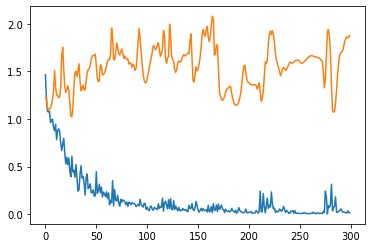

In [ ]:
# 每迭代繪製損失
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.show()

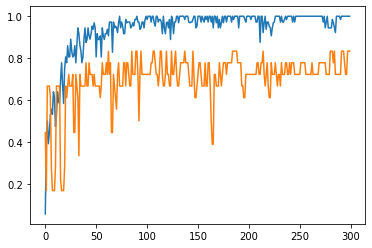

In [ ]:
# 每迭代繪製精準度
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.show()

In [ ]:
# 總結模型各層形狀與使用參數
model.summary()

Model: "model_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_59 (InputLayer)       [(None, 28, 28, 3)]       0         
                                                                 
 conv2d_154 (Conv2D)         (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_79 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_155 (Conv2D)         (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_80 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 flatten_54 (Flatten)        (None, 800)               0  